**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>
  If we also train our model with test data, then the model will learn the test data and give misleading better results.<br>

  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br> 
  More data means more learning, so if our model learns more then it will give predictions more accurately.<br>

  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br> 
  Activation functions are used to adjust the linear outputs of the layers into non-linear in order to learn more complex patterns in the data.<br>

  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>
  Softmax value for A is 0.9929, for B is 0.0067, and for C is 0.0004

  >e) What does it mean to underfit your data model?<br>
  It means the model is too simple compared to the complexity of the data.

  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>
  The probability is 0.07 which is 1 over 14.




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of XXX cat images from 15 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image

# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os

Mounted at /content/drive


### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [ ]:
class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels, **kwargs): # you are free to change parameters
        self.data = data
        self.labels = labels

    '''This function should return sample count in the dataset'''
    def __len__(self):
       return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y


In [ ]:
def get_dataset(root, mode):
  # TODO: 
  # Read dataset files
  # Resize images as 64x64 so that you have consistent data. You can use img.resize((64,64)) from PIL.Image.
  # Construct training, validation and test sets
  # Normalize datasets
  
  # Get the labels 
  label_list = os.listdir(root)

  data = []
  labels = []

  train_data = []
  train_gt = []

  val_data = []
  val_gt = []

  test_data = []
  test_gt = []

  # Split the image paths into train, validation and test
  for idx, label in enumerate(label_list):
    # print("Reading", label, "images...")

    image_dir = os.path.join(root, label)
    image_filenames = os.listdir(image_dir)
    np.random.shuffle(image_filenames)

    # Find the length of train, val, test data sets for a label
    no_of_images = len(image_filenames)
    train_len = int(no_of_images * 7 / 10)
    val_len = int(no_of_images * 1 / 10)
    test_len = no_of_images - (train_len + val_len)

    for i, img_filename in enumerate(image_filenames):
      image_path = os.path.join(image_dir, img_filename)
      
      # Read and transform the images 
      if mode == 1:
        img = Image.open(image_path).convert("L").resize((64, 64))
        img = np.array(img).flatten()
      elif mode == 2:
        img = Image.open(image_path).resize((64, 64))
        img = np.array(img)
        img = np.reshape(img, (3, 64, 64))
      else:
        print("Error: Invalid arguments.")
        return None, None, None
      
      # Normalize image
      img = img / 255.0

      # Append the image and labels into data
      if train_len > i: 
        train_data.append(img)
        train_gt.append(idx)
      elif val_len + train_len > i:
        val_data.append(img)
        val_gt.append(idx)
      else:
        test_data.append(img)
        test_gt.append(idx)

    #   if i == 0:
    #     print('Building the train data...')
    #   elif i == train_len:
    #     print('Building the validation data...')
    #   elif i == val_len:
    #     print('Building the test data...')

    # print(label, "images are completed.\n")
  train_dataset = CatsDataset(np.asarray(train_data, dtype="float"), np.asarray(train_gt))
  val_dataset = CatsDataset(np.asarray(val_data, dtype="float"), np.asarray(val_gt))
  test_dataset = CatsDataset(np.asarray(test_data, dtype="float"), np.asarray(test_gt))
  return train_dataset, val_dataset, test_dataset


In [ ]:
# I have zipped the data file in order to copy from drive to colab environment easily
zip_path = '/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/data.zip'
!cp '{zip_path}' .
!unzip -q data.zip
!rm data.zip

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [ ]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
      # you can add any additional parameters you want 
      # TODO:
      # You should create your neural network here
      super().__init__()
      # Input to Hidden1
      self.w1 = nn.Linear(4096, 2048)
      # Hidden1 to Hidden2
      self.w2 = nn.Linear(2048, 1024)
      # Hidden2 to Output
      self.w3 = nn.Linear(1024, 13)
     
    def forward(self, X): 
      # you can add any additional parameters you want
      # TODO:
      # Forward propagation implementation should be here
      in_size = X.size(0)
      X = F.relu(self.w1(X))
      X = F.relu(self.w2(X))
      X = X.view(in_size, -1)
      X = F.log_softmax(self.w3(X))
      return X


#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [ ]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
      # TODO:
      # You should create your neural network here
      super().__init__()
      self.cnn1 = nn.Conv2d(3, 8, kernel_size=3, stride=1)
      self.cnn2 = nn.Conv2d(8, 16, kernel_size=3, stride=1)
      self.cnn3 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1)
      self.cnn4 = nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=1)
      self.linear = nn.Linear(1152, 13)
      self.max_pool = nn.MaxPool2d(2)

    def forward(self, X): # you can add any additional parameters you want
      # TODO:
      # Forward propagation implementation should be here
      in_size = X.size(0)
      X = F.relu(self.cnn1(X))
      X = self.max_pool(F.relu(self.cnn2(X)))
      X = self.max_pool(F.relu(self.cnn3(X)))
      X = self.max_pool(F.relu(self.cnn4(X)))
      X = X.view(in_size, -1)
      X = F.log_softmax(self.linear(X))
      return X



###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Epoch: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

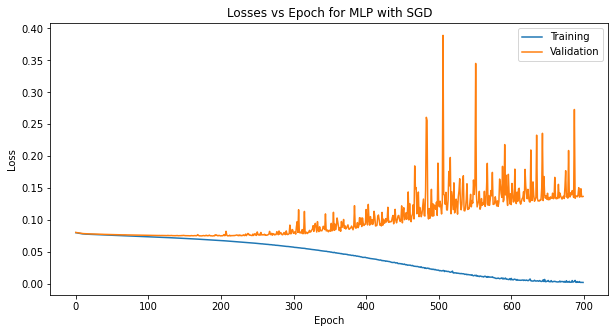

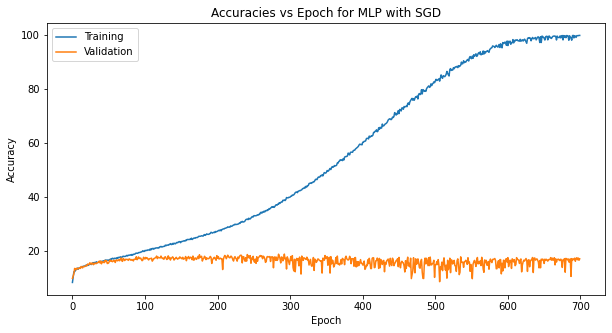

In [ ]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 16
learning_rate = 0.001

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

root = 'data' 
train_data, val_data, test_data = get_dataset(root, 1)

# Create train dataset loader
train_loader = DataLoader(dataset=train_data, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
val_loader = DataLoader(dataset=val_data, batch_size=train_batch, shuffle=True)

# Create test dataset loader
test_loader = DataLoader(dataset=test_data, batch_size=test_batch, shuffle=False)

# initialize your network
model = FNet() 
model.to(device)

# define your loss function
criterion = nn.NLLLoss() # NLLLoss is selected as the loss fonction
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04, momentum=0) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/"

train_loss_per_epoch = []
val_loss_per_epoch = []

train_acc_per_epoch = []
val_acc_per_epoch = []

best_acc = 0

for epoch in range(max_epoch):
  print("Epoch:", epoch)
  model=model.train()

  #  iterate over training batches
  #  ...
  tot_train_acc = 0
  tot_train_loss = 0

  for batch_idx, (data, labels) in enumerate(train_loader):
    data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
    data = data.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    output = model(data.float())

    loss = criterion(output, labels)
    tot_train_loss += loss.item()
    loss.backward()

    optimizer.step()

    pred = output.data.max(1, keepdim=True)[1]
    tot_train_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    # if batch_idx % 50 == 0:
    #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #         epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

  tot_train_acc = tot_train_acc / len(train_loader.dataset)
  tot_train_loss = tot_train_loss / len(train_loader.dataset) 
  train_acc_per_epoch.append(tot_train_acc * 100)
  train_loss_per_epoch.append(tot_train_loss)
  # print('Epoch: {} Train Average Loss: {:.4f}, Train Accuracy: {:.0f}%'.format(epoch, tot_train_loss, 100. * tot_train_acc))

  #  Validation
  model = model.eval()
  with torch.no_grad():
    tot_val_acc = 0
    tot_val_loss = 0

    # iterate over validation batches
    for batch_idx, (data, labels) in enumerate(val_loader):
        data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
        data = data.to(device)
        labels = labels.to(device)

        output = model(data.float())
        loss = criterion(output, labels)
        tot_val_loss += loss.item()

        pred = output.data.max(1, keepdim=True)[1]
        tot_val_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    tot_val_acc = tot_val_acc / len(val_loader.dataset)
    tot_val_loss = tot_val_loss / len(val_loader.dataset) 
    val_acc_per_epoch.append(tot_val_acc * 100)
    val_loss_per_epoch.append(tot_val_loss)
    # print('Validation set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))
    
    if tot_val_acc > best_acc:

      if not os.path.exists(best_path):
        os.makedirs(best_path)

      torch.save(model, os.path.join(best_path, "best_mlp_sgd.pth"))
      best_acc = tot_val_acc

# plot losses vs epoch 
y1 = train_loss_per_epoch
y2 = val_loss_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Losses vs Epoch for MLP with SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
y1 = train_acc_per_epoch
y2 = val_acc_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Accuracies vs Epoch for MLP with SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

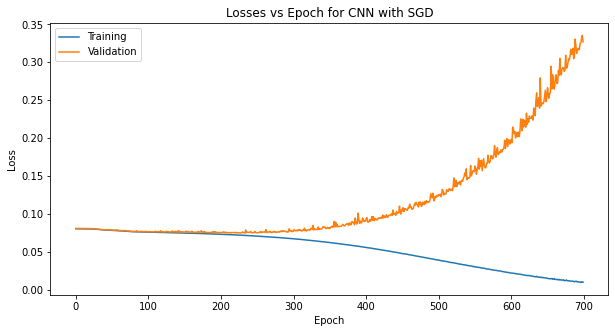

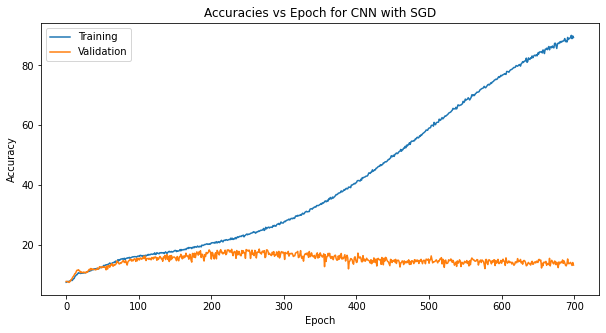

In [ ]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 16
learning_rate = 0.001

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

root = 'data' 
train_data, val_data, test_data = get_dataset(root, 2)

# Create train dataset loader
train_loader = DataLoader(dataset=train_data, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
val_loader = DataLoader(dataset=val_data, batch_size=train_batch, shuffle=True)

# Create test dataset loader
test_loader = DataLoader(dataset=test_data, batch_size=test_batch, shuffle=False)

# initialize your network
model = ConvNet()
model.to(device)

# define your loss function
criterion = nn.NLLLoss() # NLLLoss is selected as the loss fonction
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

# start training
# for each epoch calculate validation performance
# save best model according to validation performance
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/"

train_loss_per_epoch = []
val_loss_per_epoch = []

train_acc_per_epoch = []
val_acc_per_epoch = []

best_acc = 0

for epoch in range(max_epoch):
  print("Epoch:", epoch)
  model=model.train()

#    iterate over training batches
#    ...
  tot_train_acc = 0
  tot_train_loss = 0

  for batch_idx, (data, labels) in enumerate(train_loader):
    data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
    data = data.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    output = model(data.float())

    loss = criterion(output, labels)
    tot_train_loss += loss.item()
    loss.backward()

    optimizer.step()

    pred = output.data.max(1, keepdim=True)[1]
    tot_train_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    # if batch_idx % 50 == 0:
    #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #         epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

  tot_train_acc = tot_train_acc / len(train_loader.dataset)
  tot_train_loss = tot_train_loss / len(train_loader.dataset) 
  train_acc_per_epoch.append(tot_train_acc * 100)
  train_loss_per_epoch.append(tot_train_loss)
  # print('Epoch: {} Train Average Loss: {:.4f}, Train Accuracy: {:.0f}%'.format(epoch, tot_train_loss, 100. * tot_train_acc))

  #  Validation
  model = model.eval()
  with torch.no_grad():
    tot_val_acc = 0
    tot_val_loss = 0

    #     iterate over validation batches
    for batch_idx, (data, labels) in enumerate(val_loader):
        data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
        data = data.to(device)
        labels = labels.to(device)

        output = model(data.float())
        loss = criterion(output, labels)
        tot_val_loss += loss.item()

        pred = output.data.max(1, keepdim=True)[1]
        tot_val_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    tot_val_acc = tot_val_acc / len(val_loader.dataset)
    tot_val_loss = tot_val_loss / len(val_loader.dataset) 
    val_acc_per_epoch.append(tot_val_acc * 100)
    val_loss_per_epoch.append(tot_val_loss)
    # print('Validation set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))
    
    if tot_val_acc > best_acc:

      if not os.path.exists(best_path):
        os.makedirs(best_path)

      torch.save(model, os.path.join(best_path, "best_cnn_sgd.pth"))
      best_acc = tot_val_acc

# plot losses vs epoch 
y1 = train_loss_per_epoch
y2 = val_loss_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Losses vs Epoch for CNN with SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
y1 = train_acc_per_epoch
y2 = val_acc_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Accuracies vs Epoch for CNN with SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Test with SGD [15 pts.]

Report the following for your best model on your **test** set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 0.3115732241437168 
Mean Acc: 0.18303843807199513 
Mean Macro Precision: 0.18399406587377254 
Mean Macro Recall: 0.18286307157663545 
Mean Macro F1 Score: 0.17736741167723064


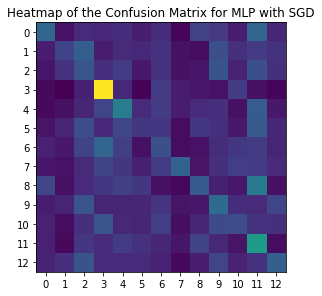

In [ ]:
# Test MLP
# load best model
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/best_mlp_sgd.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

with torch.no_grad():
  tot_val_loss = 0
  y_pred = []
  y_true = []
  #   iterate over test batches
  for batch_idx, (data, labels) in enumerate(test_loader):
      data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
      data = data.to(device)
      labels = labels.to(device)

      output = model(data.float())
      loss = criterion(output, labels)
      tot_val_loss += loss.item()

      pred = output.data.max(1, keepdim=True)[1]
      temp_labels = labels.data.view_as(pred)

      for i in range(len(pred)):
        y_pred.append(pred[i][0].item())
        y_true.append(temp_labels[i][0].item())

  #   get confusion matrix
  conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
  #   calculate accuracy
  acc = accuracy_score(y_true=y_true, y_pred=y_pred)
  #   calculate precision
  pre = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
  #   calculate recall
  recall = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
  #   calculate F1 score
  f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  losses = tot_val_loss / len(val_loader.dataset) 
  val_loss_per_epoch.append(tot_val_loss)

  # print('Test set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))


# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.title("Heatmap of the Confusion Matrix for MLP with SGD")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 0.31031780976890444 
Mean Acc: 0.16331096196868009 
Mean Macro Precision: 0.17422439043580654 
Mean Macro Recall: 0.16318049376029656 
Mean Macro F1 Score: 0.14595132555502227


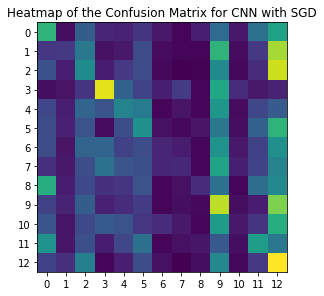

In [ ]:
# Test CNN
# load best model
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/best_cnn_sgd.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

with torch.no_grad():
  tot_val_loss = 0
  y_pred = []
  y_true = []
  # iterate over test batches
  for batch_idx, (data, labels) in enumerate(test_loader):
      data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
      data = data.to(device)
      labels = labels.to(device)

      output = model(data.float())
      loss = criterion(output, labels)
      tot_val_loss += loss.item()

      pred = output.data.max(1, keepdim=True)[1]
      temp_labels = labels.data.view_as(pred)

      for i in range(len(pred)):
        y_pred.append(pred[i][0].item())
        y_true.append(temp_labels[i][0].item())
        
#   get confusion matrix
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
#   calculate accuracy
acc = accuracy_score(y_true=y_true, y_pred=y_pred)
#   calculate precision
pre = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
#   calculate recall
recall = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
#   calculate F1 score
f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

losses = tot_val_loss / len(val_loader.dataset) 
val_loss_per_epoch.append(tot_val_loss)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.title("Heatmap of the Confusion Matrix for CNN with SGD")
plt.show()

#####Discussion for SGD
By the models that are trained with the same hyperparameters, the validation losses are decreases until an epoch number. This number is around 150 epochs for MLP and around 200 epochs for CNN. After these points, the validation loss increases even though the training loss is decreasing. Therefore we conclude that the models begin to overfit into data after these points. Moreover, we can also see the same behavior in the accuracies plots. After the points mentioned before, the average accuracies begin to decrease while the number of epochs increases. <br>

When we look at the test results, the MLP model works better than the CNN at almost every metric, except for the mean loss. The mean losses of the models are very close to each other. Therefore we can prefer MLP by considering the test results. The complexity of the MLP is also better than the CNN because its running time is smaller than the CNN.<br>

The MLP model learned the “Dilute Calico” class better than the others and the CNN model learned the “Dilute Calico”, “Siamese”, and “Tuxedo” better than the other classes.


###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Epoch: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

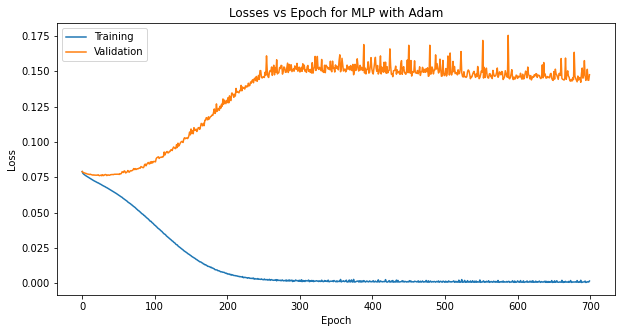

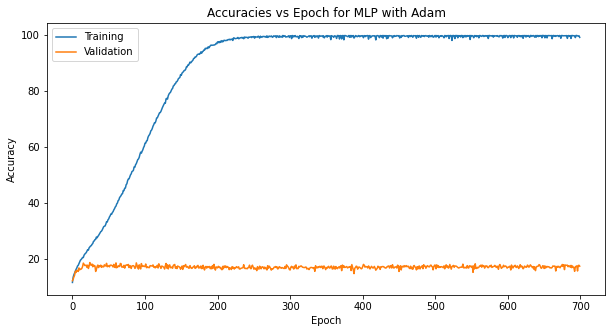

In [ ]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 16
learning_rate = 0.00001

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

root = 'data' 
train_data, val_data, test_data = get_dataset(root, 1)

# Create train dataset loader
train_loader = DataLoader(dataset=train_data, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
val_loader = DataLoader(dataset=val_data, batch_size=train_batch, shuffle=True)

# Create test dataset loader
test_loader = DataLoader(dataset=test_data, batch_size=test_batch, shuffle=False)

# initialize your network
model = FNet()
model.to(device)

# define your loss function
criterion = nn.NLLLoss() # NLLLoss is selected as the loss fonction
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/"

train_loss_per_epoch = []
val_loss_per_epoch = []

train_acc_per_epoch = []
val_acc_per_epoch = []

best_acc = 0

for epoch in range(max_epoch):
  print("Epoch:", epoch)
  model=model.train()

  #  iterate over training batches
  #  ...
  tot_train_acc = 0
  tot_train_loss = 0

  for batch_idx, (data, labels) in enumerate(train_loader):
    data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
    data = data.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    output = model(data.float())

    loss = criterion(output, labels)
    tot_train_loss += loss.item()
    loss.backward()

    optimizer.step()

    pred = output.data.max(1, keepdim=True)[1]
    tot_train_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    # if batch_idx % 50 == 0:
    #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #         epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

  tot_train_acc = tot_train_acc / len(train_loader.dataset)
  tot_train_loss = tot_train_loss / len(train_loader.dataset) 
  train_acc_per_epoch.append(tot_train_acc * 100)
  train_loss_per_epoch.append(tot_train_loss)
  # print('\nEpoch: {} Train Average Loss: {:.4f}, Train Accuracy: {:.0f}%'.format(epoch, tot_train_loss, 100. * tot_train_acc))

  #  Validation
  model = model.eval()
  with torch.no_grad():
    tot_val_acc = 0
    tot_val_loss = 0

    # iterate over validation batches
    for batch_idx, (data, labels) in enumerate(val_loader):
        data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
        data = data.to(device)
        labels = labels.to(device)

        output = model(data.float())
        loss = criterion(output, labels)
        tot_val_loss += loss.item()

        pred = output.data.max(1, keepdim=True)[1]
        tot_val_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    tot_val_acc = tot_val_acc / len(val_loader.dataset)
    tot_val_loss = tot_val_loss / len(val_loader.dataset) 
    val_acc_per_epoch.append(tot_val_acc * 100)
    val_loss_per_epoch.append(tot_val_loss)
    # print('Validation set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))
    
    if tot_val_acc > best_acc:

      if not os.path.exists(best_path):
        os.makedirs(best_path)

      torch.save(model, os.path.join(best_path, "best_mlp_adam.pth"))
      best_acc = tot_val_acc

# plot losses vs epoch 
y1 = train_loss_per_epoch
y2 = val_loss_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Losses vs Epoch for MLP with Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
y1 = train_acc_per_epoch
y2 = val_acc_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Accuracies vs Epoch for MLP with Adam')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

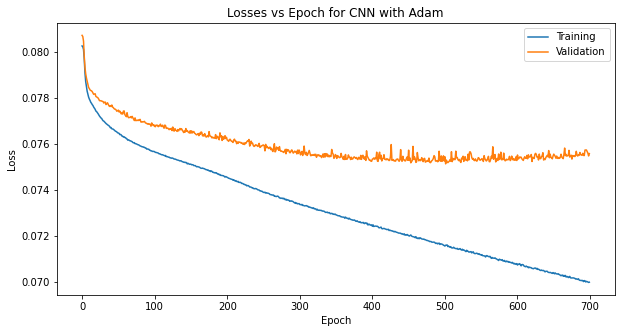

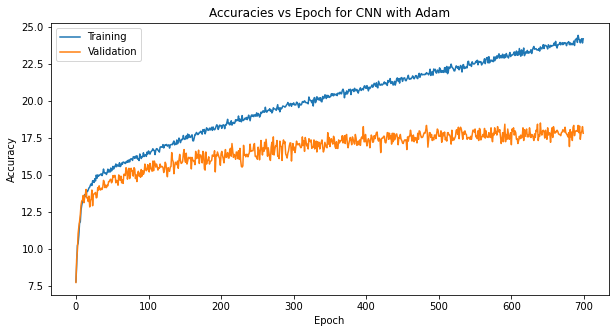

In [ ]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 16
learning_rate = 0.00001

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

root = 'data' 
train_data, val_data, test_data = get_dataset(root, 2)

# Create train dataset loader
train_loader = DataLoader(dataset=train_data, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
val_loader = DataLoader(dataset=val_data, batch_size=train_batch, shuffle=True)

# Create test dataset loader
test_loader = DataLoader(dataset=test_data, batch_size=test_batch, shuffle=False)

# initialize your network
model = ConvNet()
model.to(device)

# define your loss function
criterion = nn.NLLLoss() # NLLLoss is selected as the loss fonction
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/"

train_loss_per_epoch = []
val_loss_per_epoch = []

train_acc_per_epoch = []
val_acc_per_epoch = []

best_acc = 0

for epoch in range(max_epoch):
  print("Epoch:", epoch)
  model=model.train()

#    iterate over training batches
#    ...
  tot_train_acc = 0
  tot_train_loss = 0

  for batch_idx, (data, labels) in enumerate(train_loader):
    data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
    data = data.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    output = model(data.float())

    loss = criterion(output, labels)
    tot_train_loss += loss.item()
    loss.backward()

    optimizer.step()

    pred = output.data.max(1, keepdim=True)[1]
    tot_train_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    # if batch_idx % 50 == 0:
    #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #         epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

  tot_train_acc = tot_train_acc / len(train_loader.dataset)
  tot_train_loss = tot_train_loss / len(train_loader.dataset) 
  train_acc_per_epoch.append(tot_train_acc * 100)
  train_loss_per_epoch.append(tot_train_loss)
  # print('\nEpoch: {} Train Average Loss: {:.4f}, Train Accuracy: {:.0f}%'.format(epoch, tot_train_loss, 100. * tot_train_acc))

  #  Validation
  model = model.eval()
  with torch.no_grad():
    tot_val_acc = 0
    tot_val_loss = 0

    #     iterate over validation batches
    for batch_idx, (data, labels) in enumerate(val_loader):
        data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
        data = data.to(device)
        labels = labels.to(device)

        output = model(data.float())
        loss = criterion(output, labels)
        tot_val_loss += loss.item()

        pred = output.data.max(1, keepdim=True)[1]
        tot_val_acc += pred.eq(labels.data.view_as(pred)).cpu().sum()

    tot_val_acc = tot_val_acc / len(val_loader.dataset)
    tot_val_loss = tot_val_loss / len(val_loader.dataset) 
    val_acc_per_epoch.append(tot_val_acc * 100)
    val_loss_per_epoch.append(tot_val_loss)
    # print('Validation set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))
    
    if tot_val_acc > best_acc:

      if not os.path.exists(best_path):
        os.makedirs(best_path)

      torch.save(model, os.path.join(best_path, "best_cnn_adam.pth"))
      best_acc = tot_val_acc

# plot losses vs epoch 
y1 = train_loss_per_epoch
y2 = val_loss_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Losses vs Epoch for CNN with Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracies vs epoch
y1 = train_acc_per_epoch
y2 = val_acc_per_epoch
plt.figure(figsize=(10,5))
plt.plot(y1,label='Training')
plt.plot(y2,label='Validation')
plt.title('Accuracies vs Epoch for CNN with Adam')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 0.30183476102420376 
Mean Acc: 0.1828350620296929 
Mean Macro Precision: 0.18194290868285706 
Mean Macro Recall: 0.1826182426192155 
Mean Macro F1 Score: 0.1700279161615548


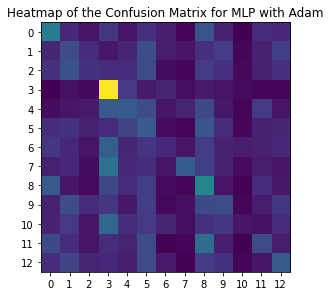

In [ ]:
# Test MLP
# load best model
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/best_mlp_adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

with torch.no_grad():
  tot_val_loss = 0
  y_pred = []
  y_true = []
  #   iterate over test batches
  for batch_idx, (data, labels) in enumerate(test_loader):
      data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
      data = data.to(device)
      labels = labels.to(device)

      output = model(data.float())
      loss = criterion(output, labels)
      tot_val_loss += loss.item()

      pred = output.data.max(1, keepdim=True)[1]
      temp_labels = labels.data.view_as(pred)

      for i in range(len(pred)):
        y_pred.append(pred[i][0].item())
        y_true.append(temp_labels[i][0].item())

  #   get confusion matrix
  conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
  #   calculate accuracy
  acc = accuracy_score(y_true=y_true, y_pred=y_pred)
  #   calculate precision
  pre = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
  #   calculate recall
  recall = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
  #   calculate F1 score
  f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  losses = tot_val_loss / len(val_loader.dataset) 
  val_loss_per_epoch.append(tot_val_loss)

  # print('Test set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(tot_val_loss, 100. * tot_val_acc))


# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.title("Heatmap of the Confusion Matrix for MLP with Adam")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 0.2993038633955568 
Mean Acc: 0.18080130160667074 
Mean Macro Precision: 0.16725021400617363 
Mean Macro Recall: 0.18070383744377397 
Mean Macro F1 Score: 0.1651584215906584


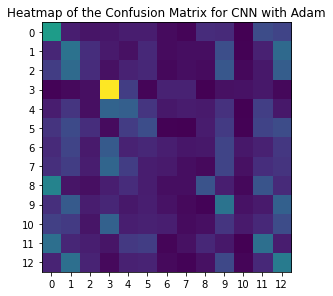

In [ ]:
# Test CNN
# load best model
best_path = "/content/drive/My Drive/Lessons/University/7th Semester/CS 464/Homeworks/Homework3/cs464_hw3/best_cnn_adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

with torch.no_grad():
  tot_val_loss = 0
  y_pred = []
  y_true = []
  # iterate over test batches
  for batch_idx, (data, labels) in enumerate(test_loader):
      data, labels = torch.autograd.Variable(data), torch.autograd.Variable(labels)
      data = data.to(device)
      labels = labels.to(device)

      output = model(data.float())
      loss = criterion(output, labels)
      tot_val_loss += loss.item()

      pred = output.data.max(1, keepdim=True)[1]
      temp_labels = labels.data.view_as(pred)

      for i in range(len(pred)):
        y_pred.append(pred[i][0].item())
        y_true.append(temp_labels[i][0].item())
        
#   get confusion matrix
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
#   calculate accuracy
acc = accuracy_score(y_true=y_true, y_pred=y_pred)
#   calculate precision
pre = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
#   calculate recall
recall = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
#   calculate F1 score
f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

losses = tot_val_loss / len(val_loader.dataset) 
val_loss_per_epoch.append(tot_val_loss)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.title("Heatmap of the Confusion Matrix for CNN with Adam")
plt.show()

#####Discussion for Adam
By the models that are trained with the same hyperparameters, the validation losses are decreases until an epoch number. This number is around 300 epochs for MLP and around 500 epochs for CNN. After these points, the validation loss increases even though the training loss is decreasing. Therefore we conclude that the models begin to overfit into data after these points. However, we cannot see the same behavior in the accuracies plots unlike the models trained with SGD. After the points mentioned before, the average accuracies are stable while the number of epochs increases.<br>

When we look at the test results, the MLP model works better than the CNN at almost every metric, except for the mean loss. The mean losses of the models are very close to each other. Therefore we can prefer MLP by considering the test results. The complexity of the MLP is also better than the CNN because its running time is smaller than the CNN.<br>

Both the MLP and CNN models learned the “Dilute Calico” class better than the other classes as can be seen in the heatmaps of the confusion matrixes.
